# Cross section

In [1]:
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from background_spherical_horndeski import latex_float

0.0559730825806917


## Physical size model with a halo mass function

We take a step beyond eq 76 of Ezquiaga+2020 by including an integral over halo mass.

$$ \tau_X^{\rm ph} = \Omega_M h \left(\frac{R_{12}}{22\rm kpc}\right)^2 \int dM \left(\frac{M}{10^{12}M_\odot}\right)^{2n-1}\int_0^{z_s}dz'\frac{f(M,z)}{M}\frac{(1+z')^2}{H(z')/H_0}\,.$$

The dimensionless quantity $f(M,z)= \frac{M^2}{\rho_0}\frac{dn}{dM}$ is the comoving fraction of halos with a given mass. When integrated over $d\log(M)$ it gives the total fraction of matter in halos.

The Vainshtein type of dependence corresponds to $n=1/3$.

**Check the halo mass function units-> https://bdiemer.bitbucket.io/colossus/lss_mass_function.html#basics**
dn/dln(M)  (units of comoving (Mpc/h)−3, indicated by q_out = dndlnM) and as **M2/ρ0dn/dM** (dimensionless, indicated by q_out = M2dndM)

For the halo mass function could use
* pyHalo: https://github.com/dangilman/pyHalo/tree/master/example_notebooks
* colossus: https://bdiemer.bitbucket.io/colossus/_static/tutorial_lss_mass_function.html

To extend the previous result we insert the 

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18');
from colossus.lss import mass_function

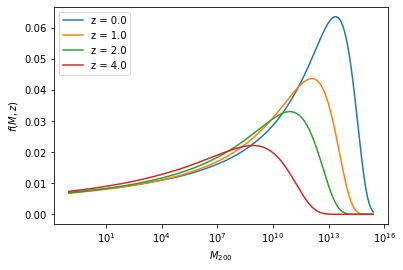

In [11]:
z = [0.0, 1.0, 2.0, 4.0]
M = 10**np.arange(-1, 15.5, 0.1)

plt.figure()
plt.xlabel('$M_{200}$')
plt.ylabel('$f(M,z)$')
plt.semilogx()
#plt.xlim(1E11, 4E15)
#plt.ylim(1E-7, 1E4)

n = 1/3

for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'M2dndM')
    p = plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
    #plt.loglog(M, M**(2*n-1)*mfunc, ':',c=p[-1].get_color())

#plt.plot([],':k',label='$M^{-1/3} f$')    
plt.legend();

#plt.ylim(1e-6,0.1)

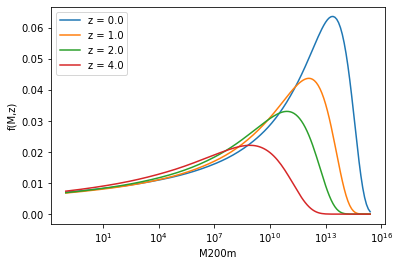

In [12]:
z = [0.0, 1.0, 2.0, 4.0]
M = 10**np.arange(-1, 15.5, 0.1)

plt.figure()
plt.xlabel('M200m')
plt.ylabel('f(M,z)')
plt.semilogx()
#plt.xlim(1E11, 4E15)
#plt.ylim(1E-7, 1E4)
for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'M2dndM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

Text(0.5, 1.0, 'cumulative integral makes sense')

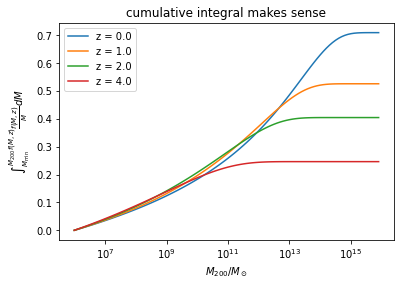

In [13]:
#integrate the halo mass function

#integrate.dblquad()

from scipy import integrate

M = 10**np.arange(6, 16, 0.1)

for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200m', model = 'tinker08', q_out = 'M2dndM')
    plt.semilogx(M, integrate.cumtrapz(mfunc/M,x=M,initial=0), '-', label = 'z = %.1f' % (z[i]))
    #print('z= %g, n= %.2e'%(z[i],integrate.cumtrapz(mfunc,M)[-1]))
    
plt.legend()
plt.xlabel(r'$M_{200}/M_\odot$')
plt.ylabel(r'$\int_{M_{\rm min}}^{M_{200}f(M,z)}\frac{f(M,z)}{M}dM$')
plt.title('cumulative integral makes sense')


**Integral for optical depth**

$$ \tau_{22\rm kpc}^{\rm ph} = \Omega_M h \left(\frac{R_{12}}{22\rm kpc}\right)^2 F(z_s,n)$$

$$F(z,n) = \int_0^{z_s}dz'\frac{(1+z')^2}{H(z')/H_0} \int d\log(M) \left(\frac{M}{10^{12}M_\odot}\right)^{2n-1}{f(M,z)}\,.$$

Problem: for $n=1/3$ (Vainsthein case) there is a very strong dependence on $M_{\rm min}$! 
Assuming $f$ tends to a constant at low $M$, the contribution for $M\in (M_1,M_2)$ reads

$$\Delta F(z,n) \approx \int_0^{z_s}dz'\frac{(1+z')^2}{H(z')/H_0}f_{\rm min} (2n-2)\left(\frac{M}{10^{12}M_\odot}\right)^{2n-1}\Big|_{M_1}^{M_2} $$

This cancels if $n=1,1/2$, but diverges for small 

In [14]:
cosmo = cosmology.getCurrent()


In [15]:
z_max = 3
z_grid = np.linspace(1e-2,z_max,100)


h,Om = cosmo.h, cosmo.Om0

M_min = 1e7

M = np.geomspace(M_min, 1e17, 50)


n_vals = [1/3.,1/2.,1]
#tau_lab = [r'1/3\, (M>%s)'%latex_float(M_min),'1/2','1']
tau_lab = [r'1/3','1/2','1']
tau_dict = {'z':z_grid, 'n':n_vals}

for n in n_vals:

    z_integrand = []

    for z in z_grid:
        mfunc = mass_function.massFunction(M, z, mdef = '200m', model = 'tinker08', q_out = 'M2dndM')
        value = integrate.trapz(mfunc/M*(M/1e12)**(2*n-1.),x=M)
        value *= (1+z)**2/np.sqrt(Om*(1+z)**3+(1-Om))
        z_integrand.append(value)
    #plt.semilogy(z_grid, z_integrand)

    tau_dict[n] = Om*h*integrate.cumtrapz(z_integrand,x=z_grid,initial=0)
#plt.plot(z_grid,integrate.cumtrapz(z_integrand,x=z_grid,initial=0))

Text(0, 0.5, '$\\tau_{\\rm phys}(z_s,n)\\; [R_{12}=22 {\\rm kpc}]$')

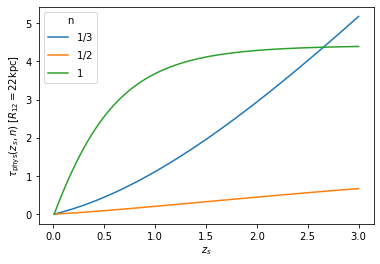

In [16]:
for i,n in enumerate(tau_dict['n']):
    plt.plot(tau_dict['z'],tau_dict[n],label=r'$%s$'%tau_lab[i])
    
plt.legend(title='n')
plt.xlabel('$z_s$')
plt.ylabel(r'$\tau_{\rm phys}(z_s,n)\; [R_{12}=22 {\rm kpc}]$')

**TO DO:** homogeneize, use either colossus or astropy

In [17]:
#optical depth
from scipy.integrate import simps,cumtrapz

import astropy.cosmology as co
import astropy.units as u
import astropy.constants as c


H0kmsMpc = h*u.km/u.s/u.Mpc
cosmo = co.FlatLambdaCDM(H0kmsMpc,Om)

def tau_einst_int(z_s): 
    ''' standard lensing optical depth integral (dimensionless)'''
    z_p = np.linspace(1e-3*z_s,z_s,100)
    DL = cosmo.angular_diameter_distance(z_p)
    DLS = cosmo.angular_diameter_distance_z1z2(z_p,z_s*np.ones(len(z_p)))
    DS = cosmo.angular_diameter_distance(z_s)

    #convert by hand
    H = cosmo.H(z_p)/(3e5*u.km/u.s)
    H0 = cosmo.H(0)/(3e5*u.km/u.s)

    integrand = H0**2*(1+z_p)**2/H*(DL*DLS/DS)

    return simps(integrand,x=z_p)

tau_einst_int = np.vectorize(tau_einst_int)

Text(0, 0.5, '$\\tau(z_s)$')

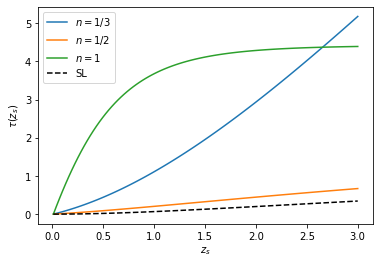

In [18]:
zs = tau_dict['z']
tau_rE = tau_einst_int(zs)

for i,n in enumerate(tau_dict['n']):
    plt.plot(tau_dict['z'],tau_dict[n],label=r'$n=%s$'%tau_lab[i])

plt.plot(zs, 3./2*Om*tau_rE,'k--',label='SL')
plt.legend()
plt.xlabel('$z_s$')
plt.ylabel(r'$\tau(z_s)$')
#plt.yscale('log')

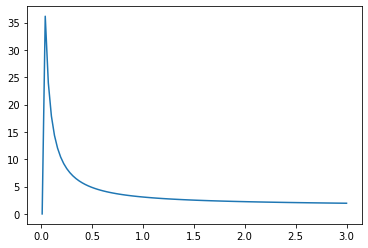

In [19]:
plt.plot(tau_dict['z'],tau_dict[0.5]/(3./2*Om*tau_rE),label=r'$n=%s$'%tau_lab[1])

## constraints

In [20]:
analysed_events = np.array(['GW190521', 'GW190910_112807', 'GW170823', 'GW191109_010717',
       'GW191129_134029', 'GW190512_180714', 'GW200219_094415',
       'GW190630_185205', 'GW190828_065509', 'GW200225_060421',
       'GW170729', 'GW190915_235702', 'GW190517_055101',
       'GW190513_205428', 'GW190421_213856', 'GW191215_223052',
       'GW190708_232457', 'GW190519_153544', 'GW170809', 'GW151012',
       'GW200112_155838', 'GW151226', 'GW190408_181802',
       'GW190706_222641', 'GW191222_033537', 'GW190828_063405',
       'GW170814', 'GW190707_093326', 'GW190503_185404', 'GW170104',
       'GW190521_074359', 'GW190727_060333', 'GW200208_130117',
       'GW170818', 'GW150914', 'GW190602_175927', 'GW200224_222234',
       'GW190720_000836', 'GW200311_115853', 'GW191216_213338',
       'GW200129_065458', 'GW200202_154313', 'GW200316_215756'])

In [21]:
import pandas as pd

from scipy.interpolate import griddata

H0kmsMpc = 70*u.km/u.s/u.Mpc
cosmo = co.FlatLambdaCDM(H0kmsMpc,0.307)

zmax=3
zs_array = np.linspace(0,zmax,100)
dLs_array = cosmo.luminosity_distance(zs)
dLs_array[0]=0

def dL2z(dL):
    ''' return z for a given d_L, cosmo is an astropy cosmology class'''    
    z = griddata(dLs_array,zs_array,dL)
    #z=np.interp(dL,dLs.value,zs)
    return z

#OLD STUFF

def tau_einst_int(z_s):
    ''' standard lensing optical depth integral (dimensionless)'''
    z_p = np.linspace(1e-5*z_s,z_s,100)
    DL = cosmo.angular_diameter_distance(z_p)
    DLS = cosmo.angular_diameter_distance_z1z2(z_p,z_s*np.ones(len(z_p)))
    DS = cosmo.angular_diameter_distance(z_s)
    #convert by hand
    H = cosmo.H(z_p)/(3e5*u.km/u.s)
    H0 = cosmo.H(0)/(3e5*u.km/u.s)
    integrand = H0**2*(1+z_p)**2/H*(DL*DLS/DS)
    return simps(integrand,x=z_p)

tau_einst_int = np.vectorize(tau_einst_int)

def tau_phys_int(z_s):
    '''optical depth integral for fix physical radius (not comoving)'''
    z_p = np.linspace(1e-3*z_s,z_s,100)
    #DL = cosmo.angular_diameter_distance(z_p)
    #DLS = cosmo.angular_diameter_distance_z1z2(z_p,z_s)
    #DS = cosmo.angular_diameter_distance(z_s)
    #convert by hand
    H = cosmo.H(z_p)/(3e5*u.km/u.s)
    H0 = cosmo.H(0)/(3e5*u.km/u.s)
    integrand = H0*(1+z_p)**2/H
    return simps(integrand,x=z_p)

tau_phys_int = np.vectorize(tau_phys_int)

In [22]:
#NEW STUFF, COMPUTE HAT TAU, WITHOUT omega_M h (R_12/22kpc)^2

z_max = 5
z_grid = np.linspace(0,z_max,100)


h,Om0 = cosmo.h, cosmo.Om0

M_min = 1e7

M = np.geomspace(M_min, 1e17, 50)


n_vals = [1/3.,1/2., 2./3., 4./3.,1]
#tau_lab = [r'1/3\, (M>%s)'%latex_float(M_min),'1/2','1']
tau_lab = [r'1/3','1/2' '2/3', '4/3','1']
bar_tau_dict = {'z':z_grid, 'n':n_vals}

for i,n in enumerate(n_vals):

    z_integrand = []

    for z in z_grid:
        mfunc = mass_function.massFunction(M, z, mdef = '200m', model = 'tinker08', q_out = 'M2dndM')
        value = integrate.trapz(mfunc/M*(M/1e12)**(2*n-1.),x=M)
        value *= (1+z)**2/np.sqrt(Om*(1+z)**3+(1-Om))
        z_integrand.append(value)
    #plt.semilogy(z_grid, z_integrand)

    bar_tau_dict[n] = integrate.cumtrapz(z_integrand,x=z_grid,initial=0)
#plt.plot(z_grid,integrate.cumtrapz(z_integrand,x=z_grid,initial=0))

def bar_tau(zs, n):
    if np.amax(zs)<=z_max and n in n_vals:
        return griddata(bar_tau_dict['z'],bar_tau_dict[n],zs)
    else:
        print('max(zs)=%g, n=%g not computed'%(np.amax(zs),n))

In [28]:
reader=pd.read_csv('gwtc_27oct.csv')
reader = reader[reader['luminosity_distance'].notna()].reset_index(drop=True)
#print(gw_z_data)
subcatalogue = []
subcat_zs = []
print ('name' , 'luminosity_distance', 'z', 'network_matched_filter_snr')
#reader=reader[reader['far']<1e-3][:].reset_index(drop=True)
reader=reader.set_index('commonName').loc[analysed_events].reset_index(drop=False)
for i in range(len(reader)):
    row = reader.iloc[i]
    if 1:#row['commonName']  in events_tested:
        subcatalogue.append(row)
        z = dL2z(np.float64(row['luminosity_distance']))
        subcat_zs.append(z)
        print (row['commonName'] , row['luminosity_distance'], '%g'%z, '%.4g'%float(row['network_matched_filter_snr']))

factor = 3 #factor at which the exclusion can be placed, from poisson statistics CDF = exp(-tau) = 0.05
#subcatalogue and associated fiducials
subcat_zs = np.array(subcat_zs)
tau_phys=tau_phys_int(subcat_zs)
#print ('tau_phys (R_x=22_kpc)', np.sum(tau_phys))
tau_einst=tau_einst_int(subcat_zs)
#print('tau_einst (alpha=1)', np.sum(tau_einst))


name luminosity_distance z network_matched_filter_snr
GW190521 3310.0 0.562035 14.3
GW190910_112807 1520.0 0.285756 14.5
GW170823 1940.0 0.355025 12.2
GW191109_010717 1290.0 0.246266 17.3
GW191129_134029 790.0 0.155253 13.1
GW190512_180714 1460.0 0.27562 12.7
GW200219_094415 3400.0 0.574925 10.7
GW190630_185205 870.0 0.170298 16.4
GW190828_065509 1540.0 0.289135 10.2
GW200225_060421 1150.0 0.221498 12.5
GW170729 2840.0 0.493649 10.8
GW190915_235702 1750.0 0.324124 13.1
GW190517_055101 1790.0 0.330729 10.8
GW190513_205428 2210.0 0.397878 12.5
GW190421_213856 2590.0 0.456297 10.7
GW191215_223052 1930.0 0.353409 11.2
GW190708_232457 930.0 0.181581 13.4
GW190519_153544 2600.0 0.457797 15.9
GW170809 1030.0 0.199848 12.8
GW151012 1080.0 0.208978 10
GW200112_155838 1250.0 0.239261 19.8
GW151226 450.0 0.088196 13.1
GW190408_181802 1540.0 0.289135 14.6
GW190706_222641 3630.0 0.607407 13.4
GW191222_033537 3000.0 0.517228 12.5
GW190828_063405 2070.0 0.375784 16.5
GW170814 600.0 0.118404 17.7
GW19

In [29]:
print(subcat_zs)

[0.56203487 0.28575638 0.35502466 0.24626567 0.15525295 0.27562021
 0.57492478 0.17029781 0.2891351  0.22149809 0.49364872 0.324124
 0.33072874 0.39787808 0.45629702 0.35340863 0.18158146 0.45779683
 0.19984839 0.20897841 0.23926116 0.088196   0.2891351  0.60740665
 0.51722805 0.37578412 0.11840403 0.1665366  0.28575638 0.19254437
 0.20897841 0.52740066 0.40098517 0.2053264  0.08611453 0.49364872
 0.31751925 0.15149098 0.22505071 0.06529977 0.17593964 0.0798701
 0.21616918]


In [30]:
len(reader)

43

In [31]:
bar_tau_phys_vainshtein = bar_tau(subcat_zs,1/3.)

bar_tau_phys_vainshtein_good = bar_tau(subcat_zs,2./3.)

bar_tau_phys_einstein = bar_tau(subcat_zs,1/2.)
bar_tau_phys_schwarzschild = bar_tau(subcat_zs,1.)

In [32]:
#print(bar_tau_phys_vainshtein)
print('tau_bar')
print('n= 1 ', np.sum(bar_tau_phys_schwarzschild))
print('n=1/2', np.sum(bar_tau_phys_einstein),np.sum(tau_einst))
print('n=1/3', np.sum(bar_tau_phys_vainshtein))
print('n=2/3', np.sum(bar_tau_phys_vainshtein_good))

tau_bar
n= 1  343.3240086110371
n=1/2 10.36503691886068 0.7375056899730063
n=1/3 49.68929843483365
n=2/3 16.9770843329742


Poisson statistics $P(k,\tau)=\frac{\tau^k}{k!}\exp(-\tau)$

**Note:** $k$ is the number of lenses affecting an event! If we consider single lenses then $k=0,1$ and we just have the product of individual probabilities!

Scenarios:
* no detection
* events with bayes factor are detected -> events are independent

**NOTE: Is this is with the whole catalogue?**

In [33]:
tau_cut = -np.log(0.05) #95% c.l.

print(r'tau_cut (95%) = ',(tau_cut))

print('--------------')

#n=1
Rx_S = 22*np.sqrt(tau_cut/(Om*h*np.sum(bar_tau_phys_schwarzschild)))
print('$R_{12}(n=1) = %.2g$ kpc'%Rx_S)

print('--------------')

#n=1/2
Rx_E = 22*np.sqrt(tau_cut/(Om*h*np.sum(bar_tau_phys_einstein)))
print('$R_{12}(n=1/2) = %.2g$ kpc'%Rx_E)


#n=1/2
alpha_E = np.sqrt(tau_cut/(3./2.*Om*np.sum(tau_einst)))
print('$alpha_E = %.2g$'%alpha_E)

print('--------------')

#n=1/3

Rx_V = 22*np.sqrt(tau_cut/(Om*h*np.sum(bar_tau_phys_vainshtein)))
print(r'$R_{12}(n=1/3) = %.2g$ kpc, ($M_{\rm min}=%s M_\odot$)'%(Rx_V,latex_float(M_min)))

#n=4/3

Rx_V_new = 22*np.sqrt(tau_cut/(Om*h*np.sum(bar_tau_phys_vainshtein_good)))
print(r'$R_{12}(n=2/3) = %.2g$ kpc'%(Rx_V_new))


tau_cut (95%) =  2.995732273553991
--------------
$R_{12}(n=1) = 4.4$ kpc
--------------
$R_{12}(n=1/2) = 25$ kpc
$alpha_E = 3$
--------------
$R_{12}(n=1/3) = 12$ kpc, ($M_{\rm min}=10^{7} M_\odot$)
$R_{12}(n=2/3) = 20$ kpc


In [34]:
print(np.sum(tau_einst))
print(np.sum(bar_tau_phys_einstein))

0.7375056899730063
10.36503691886068


Text(0, 0.5, '$\\tau(z_s)$')

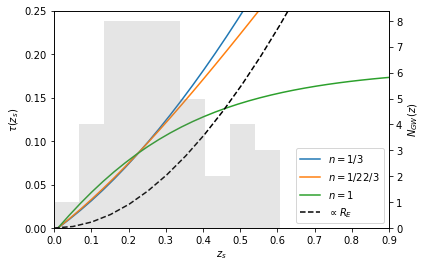

In [35]:
#now do the figure

zs = bar_tau_dict['z'].copy()
zs[0] = 1e-10
tau_rE = tau_einst_int(zs)

scales = {1:Rx_S, 1/2: Rx_E, 1/3: Rx_V, 4/3. :Rx_V_new}

tau_lab = [r'1/3','1/2' '2/3', '1']

fig,ax = plt.subplots(1) 
ax2 = ax.twinx()

for i,n in enumerate([1/3.,1/2.,1]):
    factor =  Om*h*(scales[n]/22)**2
    ax.plot(tau_dict['z'],factor*bar_tau_dict[n],label=r'$n=%s$'%tau_lab[i])

factor = 3./2*Om*alpha_E**2
ax.plot(zs, factor*tau_rE,'k--',label='$\propto R_E$')



ax.set_ylim(0,0.25)

ax.set_xlim(0,0.9)

#plt.grid()

(counts, bins) = np.histogram(subcat_zs,bins=np.linspace(0,np.amax(subcat_zs),10))

ax2.hist(bins[:-1],bins,color='gray',alpha=0.2,weights=counts,label='GW events')

ax.legend(loc='lower right',ncol=1)

#ax.yscale('log')
ax2.set_ylabel('$N_{GW}(z)$')
ax.set_xlabel('$z_s$')
ax.set_ylabel(r'$\tau(z_s)$')
#ax.yscale('log')
#ax.title('something wrong about SL computation')

#plt.savefig('2nd_paper_plots/cross_section_constrained.pdf',bbox_inches='tight')
#plt.savefig('2nd_paper_plots/cross_section_constrained.png',bbox_inches='tight')

### Horndeski tests

We can translate the constraints from our phenomenological model into constraints into the quartic theory considered by Ezquiaga & Zuma. For the Geometrical time delay (which dominates for larger halos) we need to be more careful, as the results are dpendent on the 

We observe that the time delay drops substantially when $b>r_V$, so we take the Vainshtein radius as the maximum scale for the cross section. For $b<r_V$ we have an approximate expression for the time delay, eq 179, which translates to
\begin{equation}
\Delta t_{12} \approx 2^{1/3}p_{4\phi}^{4/3}\left(\frac{H_0}{\Lambda_4}\right)^2\frac{(GM)^{4/3}}{H_0^2}\frac{1}{b} = 1.28^{14}\text{ms}p_{4\phi}^{4/3}\left(\frac{H_0}{\Lambda_4}\right)^2\left(\frac{M}{10^{12}M_\odot}\right)^{4/3}\frac{\text{kpc}}{b}\,,
\end{equation}
(we set $p_{4X}=1, p_{4XX}=0$ and get a factor 2 from integrating the atan(z)). Setting $\Delta t_{12}= 1$ms 

**The result (evaluated at rV for a theory compatible with GW speed in FRW) gives a factor ~10^3-10^4 larger than Fig 10 (or Fig 9)**

In [36]:
delay_kpc=(2**(1/3.)*(c.G*10**12*u.solMass/c.c**2)**(4/3)/(H0kmsMpc/c.c)**(2/3)/u.kpc/c.c).decompose()
print('Delta t12 = ', delay_kpc, ', (b=1kpc,M=10**12)')
print('%.4e ms'%(delay_kpc/u.ms).decompose())

Delta t12 =  5941752077.705735 s , (b=1kpc,M=10**12)
5.9418e+12 ms


In [37]:
rv = 1.2e3*(1e-8)**(1/3)
print('rv=%g kpc'%rv, '(constrained)')

print('constrained: %.4e ms'%(delay_kpc/u.ms*1e-8**(4/3)/rv).decompose())

rv=2.58532 kpc (constrained)
constrained: 4.9515e+01 ms


Try to figure out the scaling using our numerics

In [38]:
from background_spherical_horndeski import *
from constants import * #constants
import gw_mixing_small_r_limit as small

import gw_mixing as gwmix

fontsz=10
fontssz=10

In [39]:
#ms/Mpc
msOMpc = (u.Mpc/c.c/u.ms).decompose()

#factor out (M_12/M)

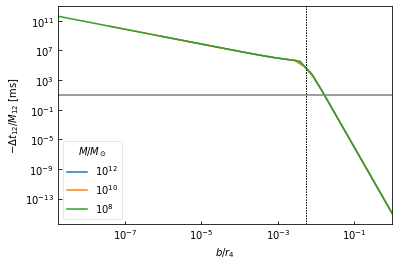

In [40]:
c2XX = 0
c4phi = 1e-4 #1e-6
c4XX = 0
c4X = -0.001
L4 = 1/np.sqrt(abs(c4X))



#todo source radius in Mpc
#r_source = 250e-3 #source radius in Mpc
#r_core = 16e-3#1e-3*r_source #core, for PIH
m = 1 #point mass as default profile

params = [c2XX, c4phi, c4X, c4XX]


log10M = 10
M = 10**log10M
maxz = 10



colors = ['b', 'r', 'g','m']

maxz = 10

#Dt10 = gwmix.vDt_r4_10(b_values,c2XX, c4phi, c4X, c4XX,L4=L4,M=M,m=m,n_points=500,z_max=maxz)

for M in [1e12, 1e10,1e8]:
    r4 = r4_Mpc(L4=L4,M=M)
    rS = rs_Mpc(M=M)
    rV = rV_Mpc(L4=L4,M=M,c4phi=c4phi)
    rSr4 = rS/r4

    b_values = np.logspace(np.log10(rS/r4),0,30)
    Dt21 = gwmix.vDt_r4_21(b_values, c2XX, c4phi, c4X, c4XX, L4=L4, M=M, m=m, n_points=500, z_max=maxz)

    #plt.loglog(b_values,-Dt10,'-',label=r'$-\Delta t_{10}$',c=colors[0])
    plt.loglog(b_values,-Dt21*r4*msOMpc/(M/1e12)**(3/3.),'-',label=r'$%s$'%latex_float(M))
    plt.axvline(rV*(1e12/M)**(1/3),ls=':',c='k',lw=1)#,label='$r_V$')

#plt.plot(b_values,1/b_values*1e-18,'k',label='1/b')

#plt.fill_betweenx(np.logspace(-80,30,10),b_values[0],rS/r4, alpha=0.2, color='gray')
#plt.axvline(rS/r4,ls='--',c='k',lw=1)#,label='$r_s$')

#plt.axhline(1,c='gray')

plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
legend=plt.legend(ncol=1,title=r'$M/M_\odot$', framealpha=0.5,fontsize=fontssz,loc='lower left')
plt.setp(legend.get_title(),fontsize=fontssz)
plt.xlabel(r'$b/r_4$',fontsize=fontsz)
plt.ylabel(r'$-\Delta t_{12}/M_{12}$ [ms]',fontsize=fontsz)
plt.xlim([min(b_values),max(b_values)])

plt.axhline(10,color='gray',label='10ms')

#plt.title(msOMpc)

#plt.ylim([1e-33,1e-8])

The overall mass scaling of $\Delta t$ is with $M$. We just use that constraint and invert

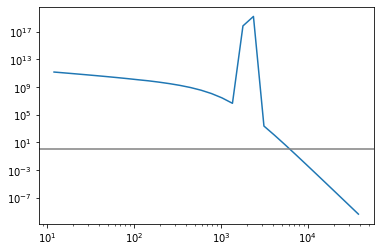

In [41]:
L4 = 1
c4phi = 1

c4XX, c2XX = 0,0

M = 1e12

c4X = -1/L4**2
params = [c2XX, c4phi, c4X, c4XX]

r4 = r4_Mpc(L4=L4,M=M)
rV = rV_Mpc(L4=L4,M=M,c4phi=c4phi)

maxz = 1

b_values = np.logspace(-2,1.5,30)*rV/r4

Dt21_12 = gwmix.vDt_r4_21(b_values,c2XX, c4phi, c4X, c4XX, L4=L4, M=M, m=1, n_points=500, z_max=maxz)


b_kpc = b_values*r4*1e3
Dt21_12_ms = msOMpc*r4*Dt21_12

plt.loglog(b_kpc,-Dt21_12_ms)
plt.axhline(1,color='gray')
#plt.axvline(2)

In [42]:
c2XX = 0
c4phi = 1e-2#1e-8 #1e-6
c4XX = 0
c4X = -1e-2
L4 = 1/np.sqrt(abs(c4X))



#todo source radius in Mpc
#r_source = 250e-3 #source radius in Mpc
#r_core = 16e-3#1e-3*r_source #core, for PIH
#point mass as default profile


def R_kpc(c4phi,L4=1, Dt12=1, M=1e12, c2XX=0, c4XX=0, maxz=10, profile = 1,N_interp=30):
    '''
        Detectability radius
        c4,phi,L4 -> params (c2XX,c4XX not yet well tested!)
        Dt12 -> sensitivity [ms]
        M -> halo mass [M_sun]
        maxz, N_interp -> integration, interpolation
        profile -> mass distribution [1 for point lens]
        NOTE: it doesn't work for very large L4!
    '''
    c4X = -1/L4**2
    params = [c2XX, c4phi, c4X, c4XX]

    r4 = r4_Mpc(L4=L4,M=M)
    rV = rV_Mpc(L4=L4,M=M,c4phi=c4phi)

    b_values = np.logspace(-2,1.5,N_interp)*rV/r4
    
    Dt21_12 = gwmix.vDt_r4_21(b_values,c2XX, c4phi, c4X, c4XX, L4=L4, M=M, m=profile, n_points=500, z_max=maxz)


    b_kpc = b_values*r4*1e3
    Dt21_12_ms = msOMpc*r4*Dt21_12
    
    return griddata(np.abs(Dt21_12_ms),b_kpc,Dt12)

R_kpc = np.vectorize(R_kpc)
print(R_kpc(1e-2,1))

2033.63369269175


Text(0.5, 1.0, '$R_{12}\\propto \\Lambda_4^{-4/3}$')

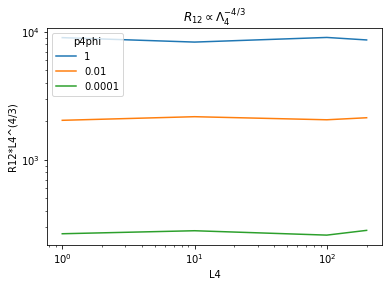

In [43]:
for p4 in [1,1e-2,1e-4]:
    L4s = np.array([1,10,100,200])
    R12s=[R_kpc(p4,L) for L in L4s]
    plt.loglog(L4s,R12s*(L4s)**(4/3.),'-',label=p4)
    
plt.legend(title='p4phi')
plt.ylabel('R12*L4^(4/3)')
plt.xlabel('L4')

plt.title('$R_{12}\propto \Lambda_4^{-4/3}$')

In [44]:
#tabulate R12 for Lambda = 1

p4s = np.geomspace(1e-10,1,20)

R12s = R_kpc(p4s,M=1e12,Dt12=10)


Text(0, 0.5, '$R_{12}$ s]')

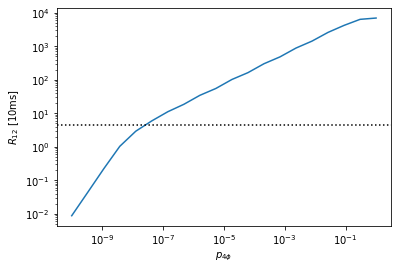

In [45]:
plt.loglog(p4s,R12s)
plt.axhline(4.6,color='k',ls=':')
plt.xlabel('$p_{4\phi}$')
plt.ylabel('$R_{12}$ [10ms]')

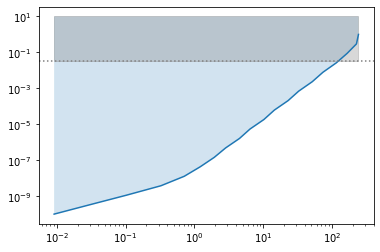

In [46]:
R_12_bound = 4.6
L4lim = (R12s/R_12_bound)**(3/4.)



plt.loglog(L4lim,p4s)
plt.fill_between(L4lim,p4s,10,alpha=0.2)

p_LLR_bound = (0.99e-3)**(0.5)

plt.axhline(p_LLR_bound,c='gray',ls=':')
plt.fill_between(L4lim, p_LLR_bound,10,color='gray',alpha=0.3)

NameError: name 'p4_gwtc3' is not defined

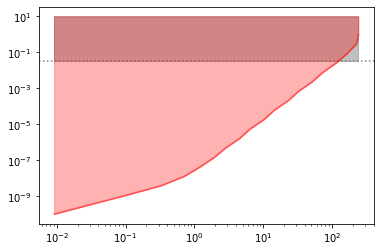

In [47]:
#plot the parameters


L4 = np.logspace(-2,5,50)


#Rx_V/1.2e3 = (p4phi/L4^2)^1/3

R_12_bound = 4.6
L4lim = (R12s/R_12_bound)**(3/4.)

p_LLR_bound = (0.99e-3)**(0.5)

plt.axhline(p_LLR_bound,c='gray',ls=':')
plt.fill_between(L4lim, p_LLR_bound,10,color='gray',alpha=0.5)

plt.loglog([],'-',color='gray',lw=10,alpha=0.3,label='LLR')

plt.loglog(L4lim,p4s,'r-',alpha=0.5,zorder=10)
plt.fill_between(L4lim,p4s,10,color='red',alpha=0.3,zorder=10)

plt.loglog([],'r-',lw=10,alpha=0.3,label='GWTC-3 (this work)')


#GW speed on FRW
p4_170817 = 1e-8*L4

plt.fill_between(L4,p4_170817,L4**0+np.amax(p4_gwtc3),color='blue',alpha=0.1)
plt.loglog(L4,p4_170817,'b--',alpha=0.5)

plt.loglog([],'b-',lw=10,alpha=0.3,label='GW170817')


plt.xlim(1e-1,200)
plt.ylim(1e-10,1)


#EFT-forbidden
plt.axvline(1,color='green',alpha=0.8)
plt.fill_betweenx(p4_gwtc3,np.amin(L4),1,color='green',alpha=0.2)

plt.annotate(r'$\Lambda_{\rm EFT}<f_{\rm LIGO}$',(2e-1,2e-10))

plt.legend(loc='lower right')

plt.xlabel('$\Lambda_4/H_0$')
plt.ylabel('$p_{4\phi}$')
#plt.grid(alpha=0.5)


#plt.savefig('2nd_paper_plots/horndseki_constrained.pdf',bbox_inches='tight')
#plt.savefig('2nd_paper_plots/horndeski_constrained.png',bbox_inches='tight')

Notes
* we are only using Shapiro delays. The geometric delays are usually larger, so this is conservative. We can use geometric via the Einstein radius parameterization.
* we neglect the redshift dependence of the all quantities. Since $\dot \phi \propto H$ this is conservative, although given the low redshifts of GWTC-3 this is negligible.
* we are assuming b = y (very weak deflection)
* we are assuming point lenses. This is ok when the radius of the lens is smaller than the vainshtein radius, otherwise one needs to reconsider.
* the change in slope corresponds to the constraint stemming from $r<r_V$ (larger $\Lambda_4$) to $r>r_V$ (smaller $\Lambda_4$). In the later case it saturates to GW170817, does it corresponds to the entire universe being birefringent? This is a non-trivial check
* LLR is based on eq 46 of Zuma2020 in the $p_{4\phi}\ll1$ limit, compared with the LLR constraint on Gdot/G. It assumes no screening 


